# Spam Detection
For detecing a message is a spam message or a Ham message.

In [145]:
# Importing data
import nltk
import numpy as np
import pandas as pd

data = pd.read_csv('spam_Ham_Data.csv',encoding='ISO-8859-1')
data.sample(7)
# Produces Random 7 samples of the data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
850,ham,U reach orchard already? U wan 2 go buy ticket...,NaN,NaN,NaN
613,ham,THANX4 TODAY CER IT WAS NICE 2 CATCH UP BUT WE...,NaN,NaN,NaN
1625,ham,Hi Dear Call me its urgnt. I don't know whats ...,NaN,NaN,NaN
2150,ham,"The table's occupied, I'm waiting by the tree",NaN,NaN,NaN
1743,ham,I love to wine and dine my lady!,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
280,ham,You got called a tool?,NaN,NaN,NaN


## Data Cleaning

In [146]:
data.shape

(5572, 5)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [148]:
# Dropping the last 3 useless columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
data.sample(7)

,v1,v2
211,ham,Home so we can always chat
54,spam,SMS. ac Sptv: The New Jersey Devils and the De...
2774,ham,"Dude u knw also telugu..thts gud..k, gud nyt.."
1446,ham,Looks like u wil b getting a headstart im leav...
3295,ham,Hi there. We have now moved in2 our pub . Woul...
4210,ham,Oi when you gonna ring
2114,spam,Sunshine Hols. To claim ur med holiday send a ...


In [149]:
data.shape

(5572, 2)

In [150]:
data.rename(columns={'v1':'class','v2':'text'}, inplace=True)
data.head(7)

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


### Applying label 

In [151]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [152]:
data['class'] = encode.fit_transform(data['class'])
data.head()

# We are getting 0-> Ham, 1-> Spam

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [153]:
# Calculting Null Values
data.isnull().sum()

class    0
text     0
dtype: int64

In [154]:
# Checking the Duplicated values
data.duplicated().sum()

403

In [155]:
# Dropping duplicates
data.drop_duplicates(keep='last', inplace=True)

Data is almost clean as we require it.<br>
No Null, No Duplicates, Correct format

## EDA - Data Analysis

Whenever we are working on a supervised learning model we need to have the idea related to the data<br>
So EDA becomes so imp

In [156]:
data['class'].value_counts() 

class
0    4516
1     653
Name: count, dtype: int64

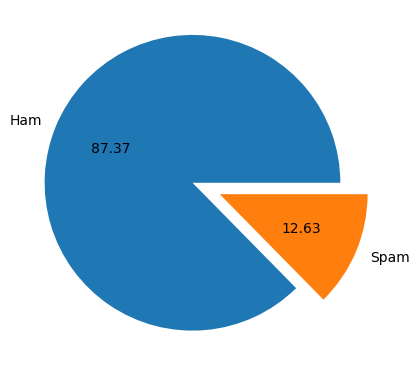

In [157]:
# Expressing it in Pie chart
import matplotlib.pyplot as plt
plt.pie(data['class'].value_counts(), labels=['Ham','Spam'], explode=[0.2,0], autopct="%0.2f")
plt.show() 

In [172]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [174]:
# Counting the no.of char, words, sentance in message

# this returns the length of all the chr present in the text
data['char_ct'] = data.text.apply(len)
data['wrd_ct'] = data.text.apply(lambda x : len(nltk.word_tokenize(x)))
data['sent_ct'] = data.text.apply(lambda x : len(nltk.sent_tokenize(x)))

data.head(9)

,class,text,char_ct,wrd_ct,sent_ct
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
10,0,I'm gonna be home soon and i don't want to tal...,109,28,2
13,0,I've been searching for the right words to tha...,196,41,3
14,0,I HAVE A DATE ON SUNDAY WITH WILL!!,35,10,2


In [175]:
# Checking the description of the the data -> word, sent, char...

data[['char_ct','wrd_ct','sent_ct']].describe()

,char_ct,wrd_ct,sent_ct
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


#### Description of the Spam and Ham Seprately

In [176]:
# Ham Messages

data[data['class']==0][['char_ct','wrd_ct','sent_ct']].describe()

,char_ct,wrd_ct,sent_ct
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [177]:
# Spam Message

data[data['class']==1][['char_ct','wrd_ct','sent_ct']].describe()


,char_ct,wrd_ct,sent_ct
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Plotting the same

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))

# Plotting the number of character
sns.histplot(data[data['class']==0]['char_ct'])
sns.histplot(data[data['class']==1]['char_ct'], color='r')

plt.show()

# Here we can see both the classes simultemasuly

In [ ]:
# Plotting the number of character
plt.figure(figsize=(12,8))

sns.histplot(data[data['class']==0]['wrd_ct'])
sns.histplot(data[data['class']==1]['wrd_ct'], color='r')

plt.show()


In [ ]:
# Plotting the number of character
plt.figure(figsize=(12,8))

sns.histplot(data[data['class']==0]['sent_ct'])
sns.histplot(data[data['class']==1]['sent_ct'], color='r')

plt.show()


### Checking the inter column relation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


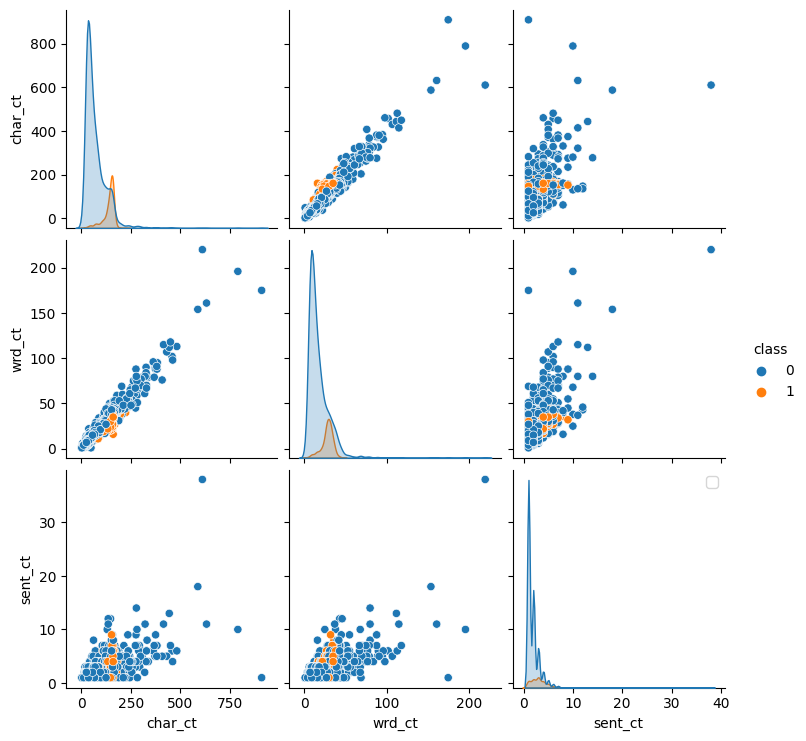

In [181]:
sns.pairplot(data, hue='class')
plt.legend()
plt.show()
# Hue= -> Coloring on the basis of the class

<Axes: >

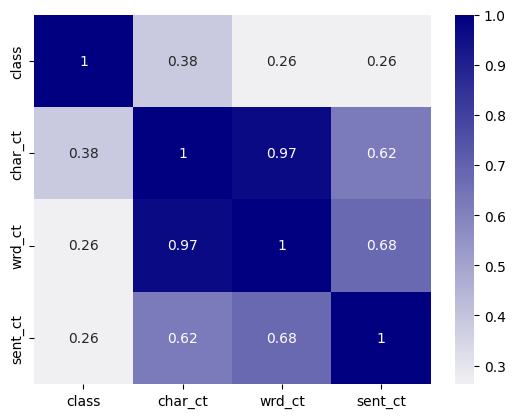

In [182]:
# Making HeatMap of the co-relattion
cplt = sns.light_palette('Navy', as_cmap = True)
sns.heatmap(data.drop(['text'],axis=1).corr(), cmap=cplt, annot = True)

Since all 3 have very strong co-relation among themseves. So we are going to keep only one of the column.

Between the 3 the heightest corr that posses with the class is char_ct so this would be the selection.

## Pre Processing

Things that we are gonna perform
- Converting all to lower case
- tokenizing
- removing special chars
- removing stop words
- stemming

In [190]:
from nltk.corpus import stopwords
import string
stp_wrds = stopwords.words('english')
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [220]:
# This func we are going to apply in all the text present.

# This is used to stem the word
from nltk.stem.porter import PorterStemmer
PS = PorterStemmer()

def transform(text):
    lst_of_words = []
    text= text.lower()
    text = nltk.word_tokenize(text)
    for wrd in text :
        if wrd.isalnum() and (wrd not in stp_wrds) and (wrd not in punc):
            lst_of_words.append(PS.stem(wrd))
    return " ".join(lst_of_words)

In [221]:
transform ("I am a awesome person. This is all about .... loveing : hehe : kaise, Ayush?")

'awesom person love hehe kais ayush'

In [222]:
data['transformed_Text'] = data['text'].apply(transform)
data.sample(5)

,class,text,char_ct,wrd_ct,sent_ct,transformed_Text
1097,0,Don't fret. I'll buy the ovulation test strips...,160,36,4,fret buy ovul test strip send wont get til lik...
4231,0,I'm at home. Please call,24,7,2,home pleas call
5097,0,Sorry about that this is my mates phone and i ...,70,15,1,sorri mate phone didnt write love kate
1447,0,DonÛ÷t give a flying monkeys wot they think a...,107,22,2,give fli monkey wot think certainli mind frien...
1332,0,It's ok lar. U sleep early too... Nite...,41,12,2,ok lar u sleep earli nite
